### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.pylab as pylab
import seaborn as sns
from sklearn import preprocessing

from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

### Data Acquisition

In [2]:
data = pd.read_csv("data/pulsar_stars.csv")

## Normalize & Clean Data

In [3]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
scaler = preprocessing.MinMaxScaler() 
scaled_values = scaler.fit_transform(data) 
data.loc[:,:] = scaled_values

data['target_class'] = data['target_class'].map({0.0: 0, 1.0: 1})

data.head()

C:\Users\davei\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.721342,0.417687,0.165043,0.015627,0.013382,0.113681,0.294986,0.063890,0
1,0.517628,0.460908,0.235415,0.018268,0.006560,0.072524,0.364015,0.108443,0
2,0.520346,0.196868,0.221138,0.040677,0.013030,0.139188,0.288624,0.054610,0
3,0.700933,0.437884,0.181750,0.016534,0.015368,0.131583,0.266348,0.046581,0
4,0.443854,0.214847,0.249044,0.041712,0.004327,0.039684,0.462029,0.213369,0


In [5]:
# Renaming columns 

data = data.rename(columns={'Mean of the integrated profile': 'IP_mean',
                        'Standard deviation of the integrated profile': 'IP_std',
                        'Excess kurtosis of the integrated profile': 'IP_kurt',
                        'Skewness of the integrated profile': 'IP_skew',
                        'Mean of the DM-SNR curve': 'DMSNR_mean',
                        'Standard deviation of the DM-SNR curve': 'DMSNR_std',
                        'Excess kurtosis of the DM-SNR curve': 'DMSNR_kurt',
                        'Skewness of the DM-SNR curve': 'DMSNR_skew',
                        'target_class': 'target'})

In [6]:
data.head()

,IP_mean,IP_std,IP_kurt,IP_skew,DMSNR_mean,DMSNR_std,DMSNR_kurt,DMSNR_skew,target
0,0.721342,0.417687,0.165043,0.015627,0.013382,0.113681,0.294986,0.063890,0
1,0.517628,0.460908,0.235415,0.018268,0.006560,0.072524,0.364015,0.108443,0
2,0.520346,0.196868,0.221138,0.040677,0.013030,0.139188,0.288624,0.054610,0
3,0.700933,0.437884,0.181750,0.016534,0.015368,0.131583,0.266348,0.046581,0
4,0.443854,0.214847,0.249044,0.041712,0.004327,0.039684,0.462029,0.213369,0


## Exploratory Data Analysis

In [7]:
data['target'].value_counts()

0    16259
1     1639
Name: target, dtype: int64

In [8]:
data.describe()

,IP_mean,IP_std,IP_kurt,IP_skew,DMSNR_mean,DMSNR_std,DMSNR_kurt,DMSNR_skew,target
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,0.563516,0.294263,0.236676,0.050966,0.055566,0.183555,0.303691,0.089553,0.091574
std,0.137325,0.092467,0.106987,0.088247,0.132059,0.188537,0.119591,0.089285,0.288432
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.509180,0.237869,0.191353,0.022939,0.007661,0.068430,0.236757,0.030962,0.000000
50%,0.584919,0.299640,0.211075,0.028480,0.011599,0.107395,0.307141,0.071285,0.000000
75%,0.649199,0.354712,0.236220,0.038912,0.023528,0.203905,0.367371,0.118432,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


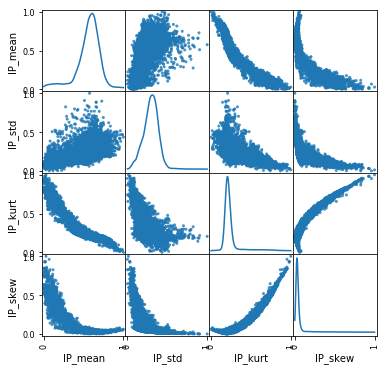

In [9]:
smaller_frame = data[['IP_mean', 'IP_std', 'IP_kurt', 'IP_skew']]

axeslist = scatter_matrix(smaller_frame, alpha=0.8, figsize=(6, 6), diagonal="kde")
for ax in axeslist.flatten():
    ax.grid(False)

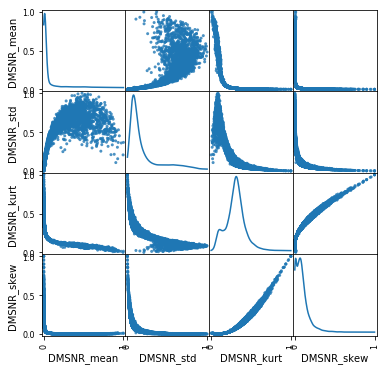

In [10]:
smaller_frame=data[['DMSNR_mean', 'DMSNR_std', 'DMSNR_kurt', 'DMSNR_skew']]

axeslist=scatter_matrix(smaller_frame, alpha=0.8, figsize=(6, 6), diagonal="kde")
for ax in axeslist.flatten():
    ax.grid(False)

In [11]:
cols = list(data.columns)
features = cols
features.remove('target')

In [12]:
X = data[features]
y = data['target']

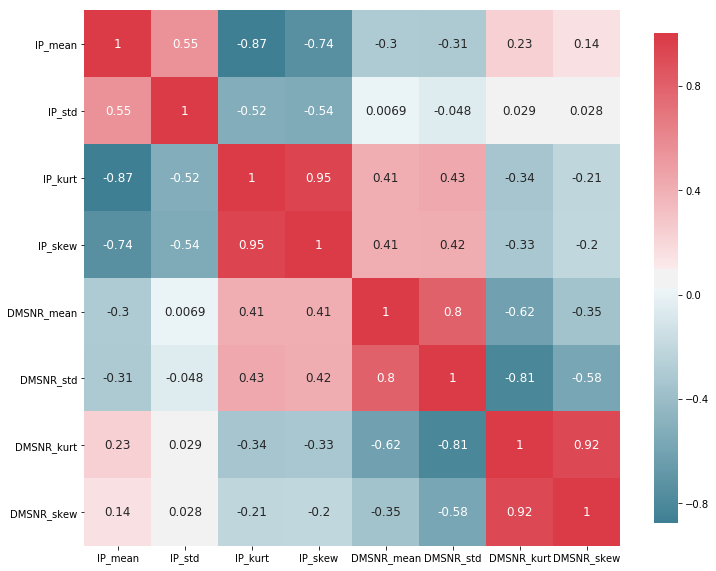

In [13]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

plot_correlation_map(X)

### Feature Engineering

In [14]:
data = data.drop(columns=['IP_kurt', 'DMSNR_kurt'])
data.head()

,IP_mean,IP_std,IP_skew,DMSNR_mean,DMSNR_std,DMSNR_skew,target
0,0.721342,0.417687,0.015627,0.013382,0.113681,0.063890,0
1,0.517628,0.460908,0.018268,0.006560,0.072524,0.108443,0
2,0.520346,0.196868,0.040677,0.013030,0.139188,0.054610,0
3,0.700933,0.437884,0.016534,0.015368,0.131583,0.046581,0
4,0.443854,0.214847,0.041712,0.004327,0.039684,0.213369,0


In [15]:
pulsar_candidates = data[data['target'] == 1].shape[0]
not_pulsar_candidates = data[data['target'] == 0].shape[0]

print(f'Pulsars:      {pulsar_candidates} -->  {pulsar_candidates/data.shape[0]*100}% of dataset')
print(f'Not Pulsars: {not_pulsar_candidates} --> {not_pulsar_candidates/data.shape[0]*100}% of dataset')

Pulsars:      1639 -->  9.157447759526203% of dataset
Not Pulsars: 16259 --> 90.8425522404738% of dataset


Class 0: 16259
Class 1: 1639
Proportion: 9.92 : 1


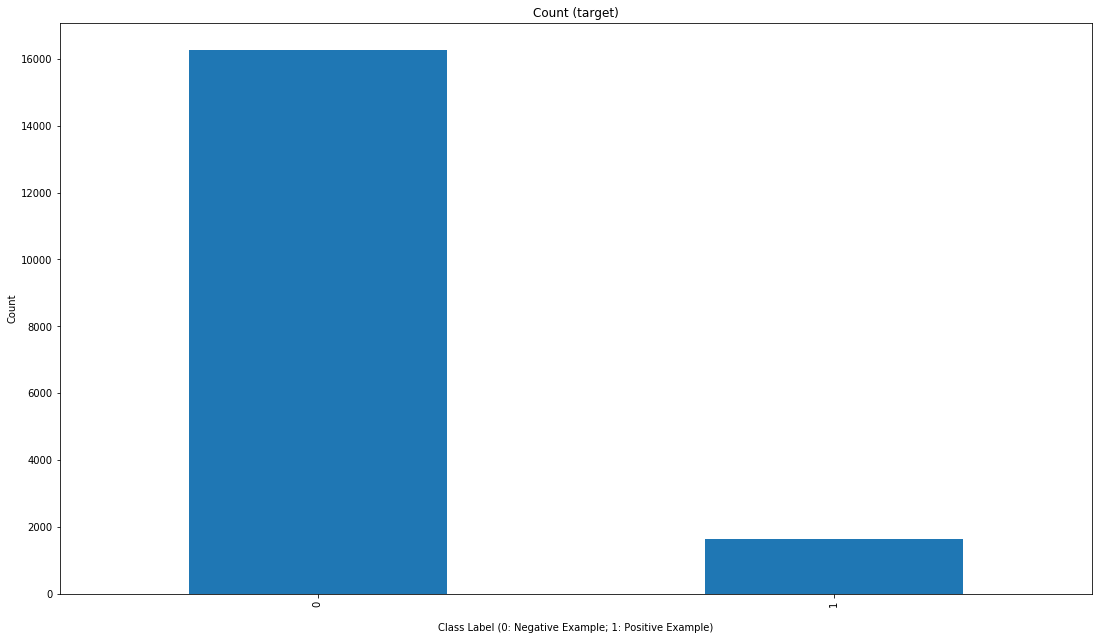

In [16]:
fig = plt.figure(figsize=(18.5, 10.5))

target_count = data['target'].value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

plt.xlabel('\nClass Label (0: Negative Example; 1: Positive Example)')
plt.ylabel('Count')

target_count.plot(kind='bar', title='Count (target)');

## Balance Data

In [17]:
data_train, data_test = train_test_split(data, test_size = 0.25,
                                         random_state = 10)

# Get test feature matrix and class target
X_test = data_test.iloc[:, :-1]
y_test = data_test.iloc[:, -1]

In [18]:
# Get class 0 and class 1
class_0 = data_train[data_train["target"] == 0]
class_1 = data_train[data_train["target"] == 1]

# Randomly under sample the majority class
class_0_under = class_0.sample(len(class_1))

# Join class_0 and class_1
balanced_data = pd.concat([class_0_under, class_1], axis = 0)

# Shuffle dataset
balanced_data = balanced_data.sample(frac = 1)

# Get train feature matrix and class target
X_train = balanced_data.iloc[:,:-1]
y_train = balanced_data.iloc[:, -1]

C:\Users\davei\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\davei\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


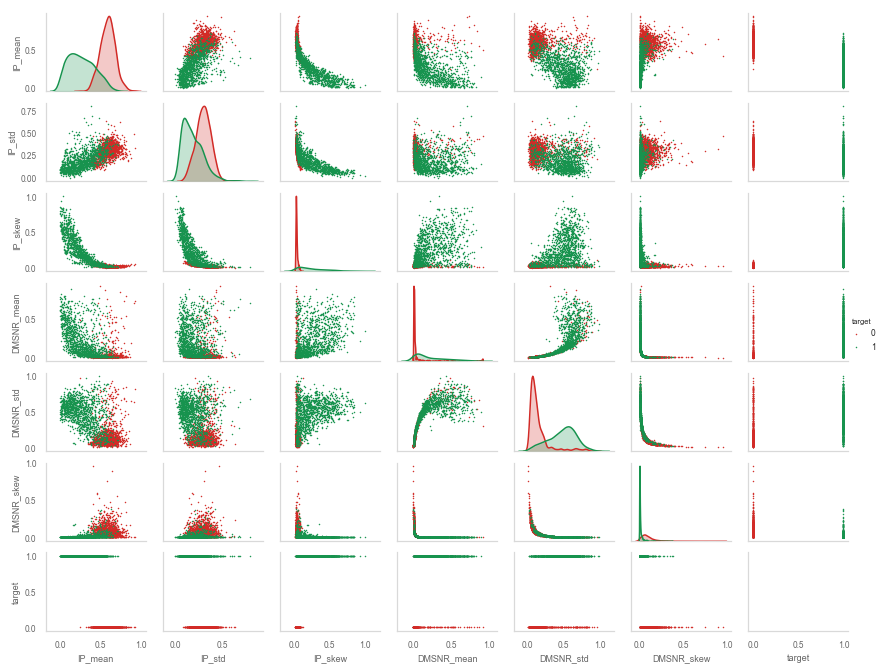

In [19]:
# Set graph style
sns.set(font_scale = 0.75)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4', 'axes.grid': False})

# Define color palette
palette = sns.color_palette("RdYlGn", 10)
palette = [palette[0], palette[-1]]

# Make graph
g = sns.pairplot(data = balanced_data, palette  = palette, 
                 plot_kws=dict(s=1, edgecolor= None, linewidth=0.5), hue = "target")
g.fig.set_size_inches(12,9)
g.savefig("Pair Plot.png", dpi = 1080)

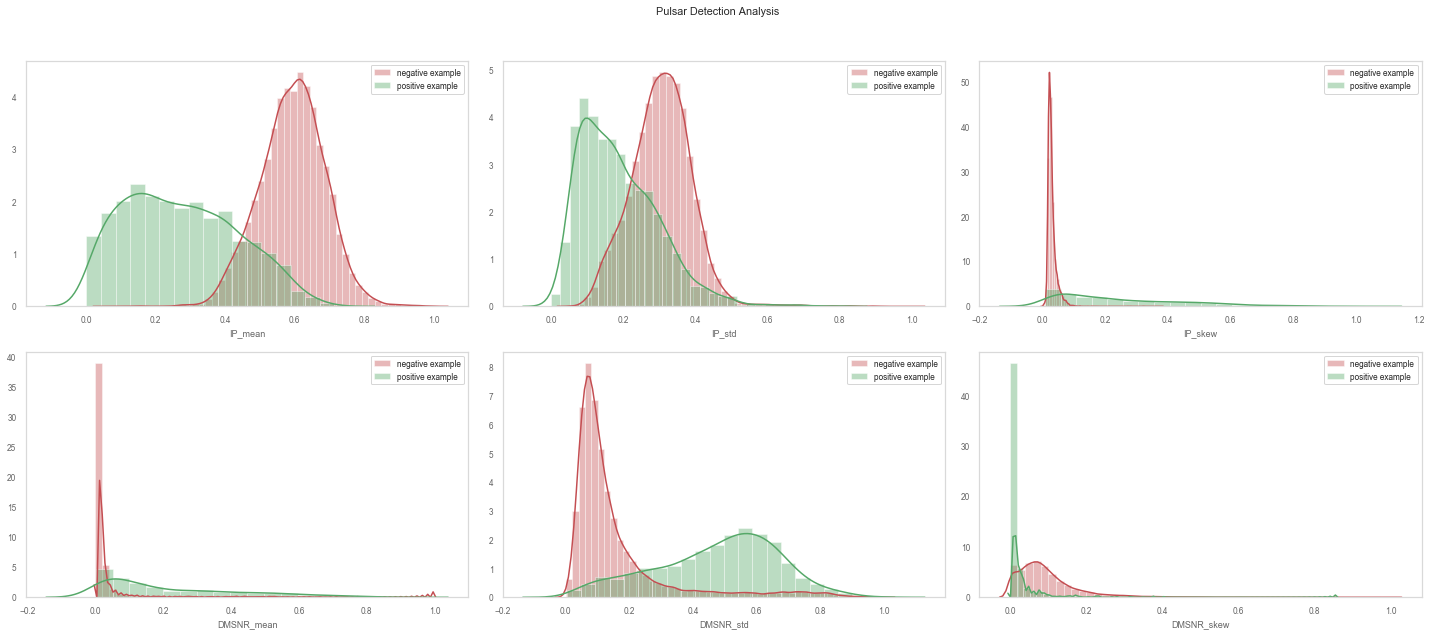

In [20]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns[:-1]:
    plt.subplot(6, 3, j+1)
    j += 1
    sns.distplot(data[i][data['target']==0], color='r', label = 'negative example')
    sns.distplot(data[i][data['target']==1], color='g', label = 'positive example')
    plt.legend(loc='best')
fig.suptitle('Pulsar Detection Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [21]:
# Create list of tuples with classifier label and classifier object
classifiers = {}
classifiers.update({"LDA": LinearDiscriminantAnalysis()})
classifiers.update({"QDA": QuadraticDiscriminantAnalysis()})
classifiers.update({"AdaBoost": AdaBoostClassifier()})
classifiers.update({"Bagging": BaggingClassifier()})
classifiers.update({"Extra Trees Ensemble": ExtraTreesClassifier()})
classifiers.update({"Gradient Boosting": GradientBoostingClassifier()})
classifiers.update({"Random Forest": RandomForestClassifier()})
classifiers.update({"Ridge": RidgeClassifier()})
classifiers.update({"SGD": SGDClassifier()})
classifiers.update({"BNB": BernoulliNB()})
classifiers.update({"GNB": GaussianNB()})
classifiers.update({"KNN": KNeighborsClassifier()})
classifiers.update({"MLP": MLPClassifier()})
classifiers.update({"LSVC": LinearSVC()})
classifiers.update({"NuSVC": NuSVC()})
classifiers.update({"SVC": SVC()})
classifiers.update({"DTC": DecisionTreeClassifier()})
classifiers.update({"ETC": ExtraTreeClassifier()})

# Create dict of decision function labels
DECISION_FUNCTIONS = {"Ridge", "SGD", "LSVC", "NuSVC", "SVC"}

In [22]:
# Initiate parameter grid
parameters = {}

# Update dict with LDA
parameters.update({"LDA": {"classifier__solver": ["svd"], 
                                         }})

# Update dict with QDA
parameters.update({"QDA": {"classifier__reg_param":[0.01*ii for ii in range(0, 101)], 
                                         }})
# Update dict with AdaBoost
parameters.update({"AdaBoost": { 
                                "classifier__base_estimator": [DecisionTreeClassifier(max_depth = ii) for ii in range(1,6)],
                                "classifier__n_estimators": [200],
                                "classifier__learning_rate": [0.001, 0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 1.0]
                                 }})

# Update dict with Bagging
parameters.update({"Bagging": { 
                                "classifier__base_estimator": [DecisionTreeClassifier(max_depth = ii) for ii in range(1,6)],
                                "classifier__n_estimators": [200],
                                "classifier__max_features": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                "classifier__n_jobs": [-1]
                                }})

# Update dict with Gradient Boosting
parameters.update({"Gradient Boosting": { 
                                        "classifier__learning_rate":[0.15,0.1,0.05,0.01,0.005,0.001], 
                                        "classifier__n_estimators": [200],
                                        "classifier__max_depth": [2,3,4,5,6],
                                        "classifier__min_samples_split": [0.001, 0.01, 0.05, 0.10],
                                        "classifier__min_samples_leaf": [0.001, 0.01, 0.05, 0.10],
                                        "classifier__max_features": ["auto", "sqrt", "log2"],
                                        "classifier__subsample": [1]
                                         }})


# Update dict with Extra Trees
parameters.update({"Extra Trees Ensemble": { 
                                            "classifier__n_estimators": [200],
                                            "classifier__class_weight": [None, "balanced"],
                                            "classifier__max_features": ["auto", "sqrt", "log2"],
                                            "classifier__max_depth" : [3, 4, 5, 6, 7, 8],
                                            "classifier__min_samples_split": [0.001, 0.01, 0.05, 0.10],
                                            "classifier__min_samples_leaf": [0.001, 0.01, 0.05, 0.10],
                                            "classifier__criterion" :["gini", "entropy"]     ,
                                            "classifier__n_jobs": [-1]
                                             }})


# Update dict with Random Forest Parameters
parameters.update({"Random Forest": { 
                                    "classifier__n_estimators": [200],
                                    "classifier__class_weight": [None, "balanced"],
                                    "classifier__max_features": ["auto", "sqrt", "log2"],
                                    "classifier__max_depth" : [3, 4, 5, 6, 7, 8],
                                    "classifier__min_samples_split": [0.001, 0.01, 0.05, 0.10],
                                    "classifier__min_samples_leaf": [0.001, 0.01, 0.05, 0.10],
                                    "classifier__criterion" :["gini", "entropy"]     ,
                                    "classifier__n_jobs": [-1]
                                     }})

# Update dict with Ridge
parameters.update({"Ridge": { 
                            "classifier__alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
                             }})

# Update dict with SGD Classifier
parameters.update({"SGD": { 
                            "classifier__alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0],
                            "classifier__penalty": ["l1", "l2"],
                            "classifier__n_jobs": [-1]
                             }})


# Update dict with BernoulliNB Classifier
parameters.update({"BNB": { 
                            "classifier__alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
                             }})

# Update dict with GaussianNB Classifier
parameters.update({"GNB": { 
                            "classifier__var_smoothing": [1e-9, 1e-8,1e-7, 1e-6, 1e-5]
                             }})

# Update dict with K Nearest Neighbors Classifier
parameters.update({"KNN": { 
                            "classifier__n_neighbors": list(range(1,31)),
                            "classifier__p": [1, 2, 3, 4, 5],
                            "classifier__leaf_size": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                            "classifier__n_jobs": [-1]
                             }})

# Update dict with MLPClassifier
parameters.update({"MLP": { 
                            "classifier__hidden_layer_sizes": [(5), (10), (5,5), (10,10), (10,10,10)],
                            "classifier__activation": ["identity", "logistic", "tanh", "relu"],
                            "classifier__learning_rate": ["constant", "invscaling", "adaptive"],
                            "classifier__max_iter": [100, 200, 300, 500],
                            "classifier__alpha": list(10.0 ** -np.arange(5, 10)),
                             }})

parameters.update({"LSVC": { 
                            "classifier__penalty": ["l2"],
                            "classifier__C": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]
                             }})

parameters.update({"NuSVC": { 
                            "classifier__nu": [0.25, 0.50, 0.75],
                            "classifier__kernel": ["linear", "rbf", "poly"],
                            "classifier__degree": [1,2,3,4,5,6],
                             }})

parameters.update({"SVC": { 
                            "classifier__kernel": ["linear", "rbf", "poly"],
                            "classifier__gamma": ["auto"],
                            "classifier__C": [0.1, 0.5, 1, 5, 10, 50, 100],
                            "classifier__degree": [1, 2, 3, 4, 5, 6]
                             }})


# Update dict with Decision Tree Classifier
parameters.update({"DTC": { 
                            "classifier__criterion" :["gini", "entropy"],
                            "classifier__splitter": ["best", "random"],
                            "classifier__class_weight": [None, "balanced"],
                            "classifier__max_features": ["auto", "sqrt", "log2"],
                            "classifier__max_depth" : [1,2,3, 4, 5, 6, 7, 8],
                            "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                            "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                             }})

# Update dict with Extra Tree Classifier
parameters.update({"ETC": { 
                            "classifier__criterion" :["gini", "entropy"],
                            "classifier__splitter": ["best", "random"],
                            "classifier__class_weight": [None, "balanced"],
                            "classifier__max_features": ["auto", "sqrt", "log2"],
                            "classifier__max_depth" : [1,2,3, 4, 5, 6, 7, 8],
                            "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                            "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                             }})

In [23]:
# Initialize dictionary to store results
results = {}

# Tune and evaluate classifiers
for classifier_label, classifier in classifiers.items():
    # Print message to user
    print(f"Now tuning {classifier_label}.")
    
    # Scale features via Z-score normalization
    scaler = StandardScaler()
    
    # Define steps in pipeline
    steps = [("scaler", scaler), ("classifier", classifier)]
    
    # Initialize Pipeline object
    pipeline = Pipeline(steps = steps)
      
    # Define parameter grid
    param_grid = parameters[classifier_label]
    
    # Initialize GridSearch object
    gscv = GridSearchCV(pipeline, param_grid, cv = 5,  n_jobs= -1, verbose = 1, scoring = "recall")
                      
    # Fit gscv
    gscv.fit(X_train, np.ravel(y_train))  
    
    # Get best parameters and score
    best_params = gscv.best_params_
    best_score = gscv.best_score_
    
    # Update classifier parameters and define new pipeline with tuned classifier
    tuned_params = {item[12:]: best_params[item] for item in best_params}
    classifier.set_params(**tuned_params)
            
    # Make predictions
    if classifier_label in DECISION_FUNCTIONS:
        y_pred = gscv.decision_function(X_test)
    else:
        y_pred = gscv.predict_proba(X_test)[:,1]
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    
    # Get f1 score
    y_pred = gscv.predict(X_test)
    f1 = metrics.f1_score(y_test, y_pred)
    
    # Get recall score
    recall = metrics.recall_score(y_test, y_pred)

    # Get precision score
    precision = metrics.precision_score(y_test, y_pred)
    
    # False Positive rate
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fp_rate = (fp)/(fp + tn)

    # Save results
    result = {"Classifier": gscv,
              "Best Parameters": best_params,
              "Training Recall Score": best_score,
              "Test Recall Score": recall,
              "Test Precision Score": precision,
              "Test F1 Score": f1,
              "False Positive Rate": fp_rate,
              "Test AUC": auc}
    
    results.update({classifier_label: result})

Now tuning LDA.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Now tuning QDA.
Fitting 5 folds for each of 101 candidates, totalling 505 fits


[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 505 out of 505 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Now tuning AdaBoost.
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   28.9s finished


Now tuning Bagging.
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   17.0s finished


Now tuning Extra Trees Ensemble.
Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  6.9min finished


Now tuning Gradient Boosting.
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  6.0min finished


Now tuning Random Forest.
Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  9.5min finished


Now tuning Ridge.
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Now tuning SGD.
Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    0.2s finished
C:\Users\davei\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\davei\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
[Parallel(n_job

Now tuning BNB.
Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Now tuning GNB.
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Now tuning KNN.
Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 7500 out of 7500 | elapsed:  4.1min finished


Now tuning MLP.
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 13.0min finished
C:\Users\davei\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.m

Now tuning LSVC.
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Now tuning NuSVC.
Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   12.2s finished


Now tuning SVC.
Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:   10.5s finished


Now tuning DTC.
Fitting 5 folds for each of 3072 candidates, totalling 15360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 4848 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 9048 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 14448 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 15360 out of 15360 | elapsed:   25.3s finished
C:\Users\davei\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\davei\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\U

Now tuning ETC.
Fitting 5 folds for each of 3072 candidates, totalling 15360 fits


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2760 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 7260 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 13560 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 15360 out of 15360 | elapsed:   23.7s finished
C:\Users\davei\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


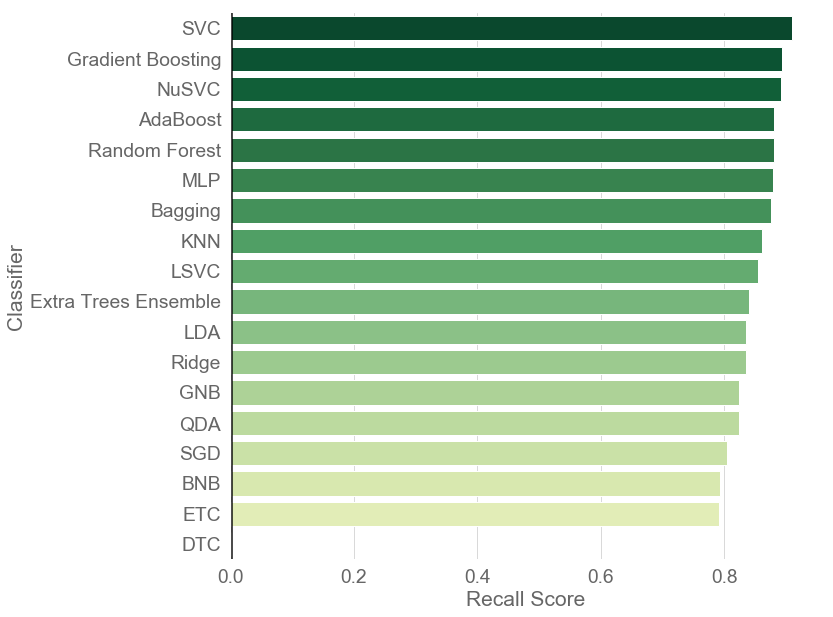

In [58]:
# Recall scores plot
recall_scores = {
              "Classifier": [],
              "Recall Score": [],
              }

# Get recall scores into dictionary
for classifier_label in results:  
    recall_scores.update({"Classifier": [classifier_label] + recall_scores["Classifier"],
                       "Recall Score": [results[classifier_label]["Test Recall Score"]] + recall_scores["Recall Score"]
                       })

# Dictionary to PandasDataFrame
recall_scores = pd.DataFrame(recall_scores)

# Sort dataframe
recall_scores = recall_scores.sort_values(by = ["Recall Score"], ascending = False)

# Set graph style
sns.set(font_scale = 1.75)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Colors
palette = sns.color_palette("YlGn", 20)[::-1]

# Set figure size and create barplot
f, ax = plt.subplots(figsize=(12, 9))

sns.barplot(x="Recall Score", y="Classifier", palette = palette,
            data = recall_scores)

# Generate a bolded horizontal line at y = 0
ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)

# Turn frame off
ax.set_frame_on(False)

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Recall Scores Bar Plot.png", dpi = 1080)

In [25]:
recall_scores

,Classifier,Recall Score
2,SVC,0.909794
12,Gradient Boosting,0.894330
3,NuSVC,0.891753
15,AdaBoost,0.881443
11,Random Forest,0.881443
5,MLP,0.878866
14,Bagging,0.876289
6,KNN,0.860825
4,LSVC,0.855670
13,Extra Trees Ensemble,0.840206


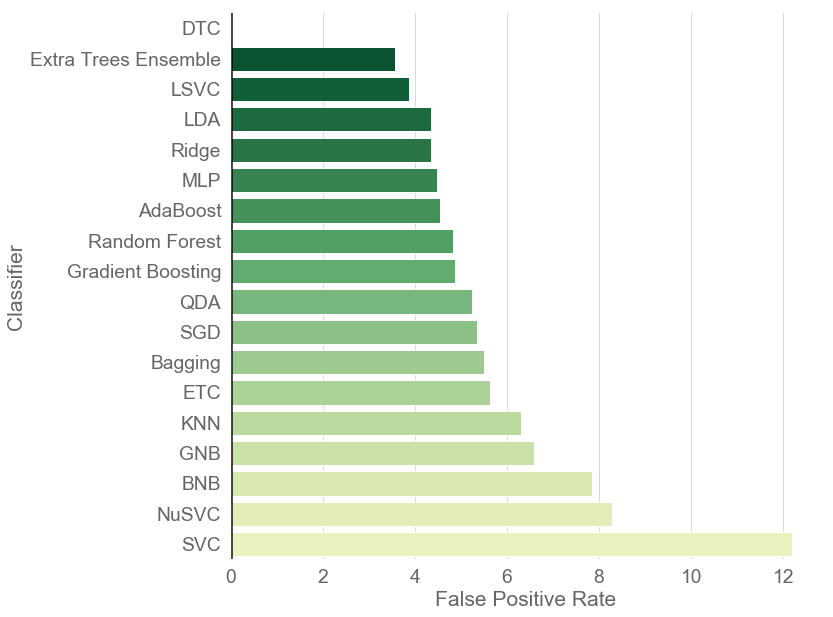

In [26]:
# False positive rate plot
fpr_scores = {
              "Classifier": [],
              "False Positive Rate": [],
              }

# Get fpr into dictionary
for classifier_label in results:
    fpr_scores.update({"Classifier": [classifier_label] + fpr_scores["Classifier"],
                       "False Positive Rate": [results[classifier_label]["False Positive Rate"]] + fpr_scores["False Positive Rate"]
                       })
    

# Dictionary to PandasDataFrame
fpr_scores = pd.DataFrame(fpr_scores)

# Sort dataframe
fpr_scores = fpr_scores.sort_values(by = ["False Positive Rate"])

# Convert decimals to percentages
fpr_scores[fpr_scores.select_dtypes(include=['number']).columns] *= 100

# Set graph style
sns.set(font_scale = 1.75)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Colors
palette = sns.color_palette("YlGn", 20)[::-1]


# Set figure size and create barplot
f, ax = plt.subplots(figsize=(12, 9))

sns.barplot(x="False Positive Rate", y="Classifier", palette = palette,
            data = fpr_scores)


# Generate a bolded horizontal line at y = 0
ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)

# Turn frame off
ax.set_frame_on(False)

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("False Positive Rate Bar Plot.png", dpi = 1080)

In [34]:
results

{'LDA': {'Classifier': GridSearchCV(cv=5, error_score='raise-deprecating',
         estimator=Pipeline(memory=None,
       steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001))]),
         fit_params=None, iid='warn', n_jobs=-1,
         param_grid={'classifier__solver': ['svd']}, pre_dispatch='2*n_jobs',
         refit=True, return_train_score='warn', scoring='recall', verbose=1),
  'Best Parameters': {'classifier__solver': 'svd'},
  'Training Recall Score': 0.8896882494004796,
  'Test Recall Score': 0.8350515463917526,
  'Test Precision Score': 0.6454183266932271,
  'Test F1 Score': 0.7280898876404495,
  'False Positive Rate': 0.04355272816246636,
  'Test AUC': 0.9542067001480682},
 'QDA': {'Classifier': GridSearchCV(cv=5, error_score='raise-deprecating',
         estimator=Pipeline(memory=None,
       step

In [27]:
fpr_scores

,Classifier,False Positive Rate
1,DTC,0.000000
13,Extra Trees Ensemble,3.572302
4,LSVC,3.865916
17,LDA,4.355273
10,Ridge,4.355273
5,MLP,4.477612
15,AdaBoost,4.551015
11,Random Forest,4.820161
12,Gradient Boosting,4.869097
16,QDA,5.236115


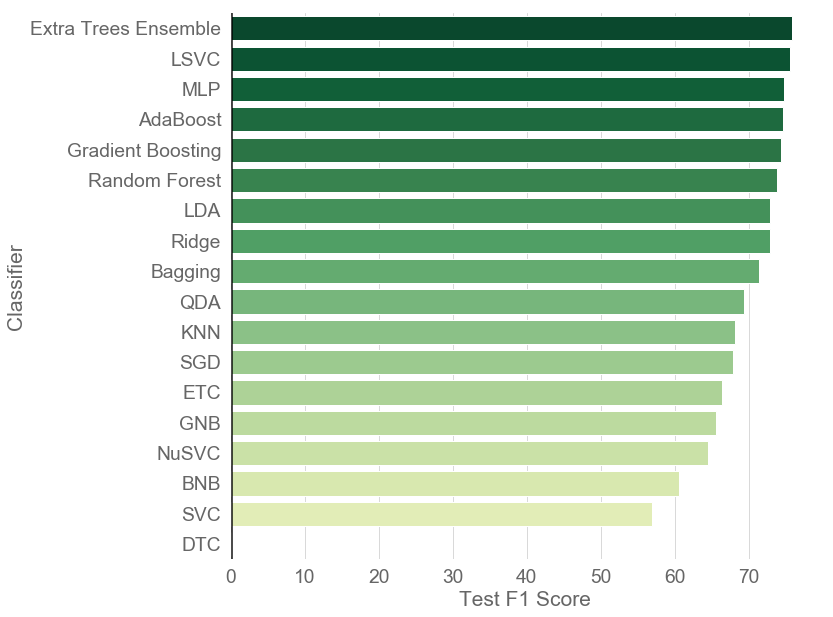

In [57]:
F1_scores = {
              "Classifier": [],
              "Test F1 Score": [],
              }

# Get fpr into dictionary
for classifier_label in results:
    F1_scores.update({"Classifier": [classifier_label] + F1_scores["Classifier"],
                       "Test F1 Score": [results[classifier_label]["Test F1 Score"]] + F1_scores["Test F1 Score"]
                       })

F1_scores = pd.DataFrame(F1_scores)

# Sort dataframe
F1_scores = F1_scores.sort_values(by = ["Test F1 Score"], ascending=False)

# Convert decimals to percentages
F1_scores[F1_scores.select_dtypes(include=['number']).columns] *= 100

# Set graph style
sns.set(font_scale = 1.75)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Colors
palette = sns.color_palette("YlGn", 20)[::-1]


# Set figure size and create barplot
f, ax = plt.subplots(figsize=(12, 9))

sns.barplot(x="Test F1 Score", y="Classifier", palette = palette,
            data = F1_scores)


# Generate a bolded horizontal line at y = 0
ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)

# Turn frame off
ax.set_frame_on(False)

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Test F1 Score Bar Plot.png", dpi = 1080)

In [54]:
F1_scores = F1_scores.sort_values(by = ["Test F1 Score"], ascending=False)
F1_scores

,Classifier,Test F1 Score
13,Extra Trees Ensemble,75.813953
4,LSVC,75.626424
5,MLP,74.780702
15,AdaBoost,74.672489
12,Gradient Boosting,74.304069
11,Random Forest,73.786408
10,Ridge,72.808989
17,LDA,72.808989
14,Bagging,71.353620
16,QDA,69.414317


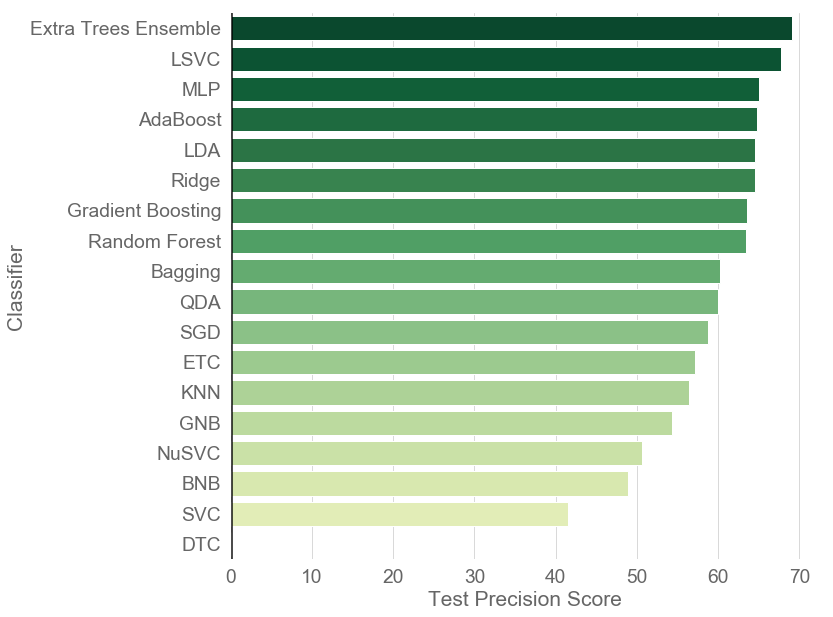

In [63]:
precision_scores = {
              "Classifier": [],
              "Test Precision Score": [],
              }

# Get fpr into dictionary
for classifier_label in results:
    precision_scores.update({"Classifier": [classifier_label] + precision_scores["Classifier"],
                       "Test Precision Score": [results[classifier_label]["Test Precision Score"]] + precision_scores["Test Precision Score"]
                       })

precision_scores = pd.DataFrame(precision_scores)

# Sort dataframe
precision_scores = precision_scores.sort_values(by = ["Test Precision Score"], ascending=False)

# Convert decimals to percentages
precision_scores[precision_scores.select_dtypes(include=['number']).columns] *= 100

# Set graph style
sns.set(font_scale = 1.75)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Colors
palette = sns.color_palette("YlGn", 20)[::-1]


# Set figure size and create barplot
f, ax = plt.subplots(figsize=(12, 9))

sns.barplot(x="Test Precision Score", y="Classifier", palette = palette,
            data = precision_scores)


# Generate a bolded horizontal line at y = 0
ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)

# Turn frame off
ax.set_frame_on(False)

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Test Precision Score Bar Plot.png", dpi = 1080)

In [64]:
precision_scores

,Classifier,Test Precision Score
13,Extra Trees Ensemble,69.067797
4,LSVC,67.755102
5,MLP,65.076336
15,AdaBoost,64.772727
17,LDA,64.541833
10,Ridge,64.541833
12,Gradient Boosting,63.553114
11,Random Forest,63.450835
14,Bagging,60.176991
16,QDA,59.925094
